# INST 447 Project - Income & Redevelopment
Names: Catherine Onumajuru, Amber Dietrich

Date: 12/3/19

## Introduction
Redevelopment is a process of new construction in a neighborhood to either build new homes and housing complexes or new additions to existing homes, such as another bathroom in an apartment, another room in a house or another floor level. It often takes place in metropolitan areas, such as Washington D.C., where population grows yearly and demand for more housing increases. In D.C. some neighborhoods have experienced changes, in which thousands of apartments and houses have been built, while some neighborhoods haven’t experienced as many of these changes. Why do some neighborhoods see more redevelopment, while others don’t? Is it because of income? Race? Other factors? Does income increase as a neighborhood experiences more redevelopment? These are questions that we hope to answer with this project. Our project will be looking at whether income affects the amount of building permits in each ward in D.C. We want to see if there’s a relationship between income and redevelopment or the amount of building permits in D.C., in order to analyze the trend of redevelopment in D.C.

We used building permit data from opendatadc.gov (https://opendata.dc.gov/datasets/building-permits-in-2013). Building permit data from 2009-2017 were obtained or downloaded from the website in csv format and merged into two dataframes. One dataframe contained permits from 2009-2013 and the other dataframe contained permits from 2013-2017. The dataset contains locations and various attributes of building construction and alteration permits applied for and approved by the District of Columbia Department of Consumer and Regulatory Affairs. The attribute or variable that we worked with in this dataset was the ward variable. The other data that we worked with was the 2009-2013 and 2013-2017 American Community Survey (ACS) 5 Year Estimate. These two were downloaded from the Office of Planning page from DC.gov (https://planning.dc.gov/page/american-community-survey-acs-estimates) in xls format. These datasets provide data about each ward in D.C., such as age, gender, family, income, education and more. We worked with the income part of the datasets and used the median household income (in dollars) variable for our analysis. 

## Method
An explanation of our code, processing and analytical steps that we took is included in each cell. However, here is a list of all the steps we took
1. Imported the necessary libraries (pandas and matplotlib.pyplot)
2. Loaded all building permit files and ACS 5-year estimate files into jupyter notebook
3. Merged the building permit files from 2013-2017 into one dataset
4. Merged the building permit files from 2009-2013 into one dataset
5. Calculated the number of permits per ward by doing a groupby function, grouping it by ward and aggregating it by count. 
6. Found the median household income for each ward in the 2013-2017 ACS file

    a. Cleaned up the ACS file by dropping the unnamed columns
    
    b. Cleaned up the formatting of the ACS file by taking out the whitespace in the values under the Subject column
    
        i. Used str.strip() when selecting the Median Household Income row
        
    c. Selected the Median Household Income (in dollars) row under the Subject column, by using brackets and selecting the part of the dataframe where the subject column is equal to Median household income (dollars).
    
    d. Renamed the columns of the new dataframe obtained from the previous step to only be the ward number instead of having ‘ward’ with the number. This is done to keep standardization across all dataframes since we’re going to merge the permit amount dataframe and income dataframe together
    
7. Merged permit amount data frame and median income data frame into one dataframe.

    a. First, changed median income dataframe from wide to long format
    
    b. Then did an outer merge of the two dataframes on the Ward variable
    
        i. First changed the data type of the Ward variable in the income data from an object to an integer, since you 
        can’t merge on two different data types.
        
    c. Added a column onto the merged dataframe that signifies the year range of the data
    
8. Repeated steps 5 through 7 for the 2009-2013 building permit files and ACS files

    a. When selecting median household income, changed it to equal Median Household Income 
    
9. Created graphs to visualize results

    a. Bar Graph
    
        i. First, made sure that all of the variables (income, permit numbers, and ward numbers) were integers.
        ii. Labeled the axes appropriately for each bar graph. One graph showed the relationship between ward and income level and the other showed the relationship between ward and the number of permits.
        iii. Used plt.bar to plot the data
            1. Graph1: x = ward, y = number of permits
            2. Graph 2: x = ward, y = median household income
        iv. Plotted the two time intervals side by side for each ward. Each was a different color, 2009-2013 being blue and 2013-2017 being orange.
            1. To plot them side by side I adjusted the x variable by adding a variable called width to the values in the date range of 2013-2017. 
            
    b. Scatterplot
    
        i. First, merged the 2009-2013 and 2013-2017 datasets into one dataset.
        ii. Used plt.scatter to plot number of permits on the x-axis and median income on the y-axis.
        iii. Labeled the axes appropriately by using plt.
        iv. Added a title to the graph by using plt.title()
        
10. Calculated the correlation between the number of permits and the income

    a. Used the corr() function on our final merged dataframe that has the two year ranges. 


## Processing

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#load building permit files
permit_2009 = pd.read_csv("Building_Permits_in_2009.csv")
permit_2010 = pd.read_csv("Building_Permits_in_2010.csv")
permit_2011 = pd.read_csv("Building_Permits_in_2011.csv")
permit_2012 = pd.read_csv("Building_Permits_in_2012.csv")

permit_2013 = pd.read_csv("Building_Permits_in_2013.csv")
permit_2014 = pd.read_csv("Building_Permits_in_2014.csv")
permit_2015 = pd.read_csv("Building_Permits_in_2015.csv")
permit_2016 = pd.read_csv("Building_Permits_in_2016.csv")
permit_2017 = pd.read_csv("Building_Permits_in_2017.csv")

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#load income data
income = pd.read_excel("2013-2017 ACS 5-Year Ward.xls", sheet_name=2, header=2) # loads only the 2nd sheet in the file and makes the 2nd row the header
income2 = pd.read_excel("2009-2013 ACS 5-Year Esitmates-Ward_0.xls", sheet_name=1, header=2)

In [5]:
income.head()

,Subject,Ward 1,Unnamed: 2,Ward 2,Unnamed: 4,Ward 3,Unnamed: 6,Ward 4,Unnamed: 8,Ward 5,Unnamed: 10,Ward 6,Unnamed: 12,Ward 7,Unnamed: 14,Ward 8,Unnamed: 16
0,NaN,Estimate,Percent,Estimate,Percent,Estimate,Percent,Estimate,Percent,Estimate,Percent,Estimate,Percent,Estimate,Percent,Estimate,Percent
1,EMPLOYMENT STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Population 16 years and over,73861,73861,73759,73759,71683,71683,69045,69045,72938,72938,79004,79004,62981,62981,61344,61344
3,In labor force,57814,0.783,54181,0.735,51994,0.725,47418,0.687,47153,0.646,61055,0.773,36508,0.58,36298,0.592
4,Civilian labor force,57695,0.781,53901,0.731,51924,0.724,47306,0.685,47047,0.645,59740,0.756,36426,0.578,34941,0.57


In [6]:
#merge permit data from 2013-2017
permits = pd.concat([permit_2013, permit_2014, permit_2015, permit_2016, permit_2017])

In [7]:
#take a brief look at permit data
permits.head()

,X,Y,OBJECTID,DCRAINTERNALNUMBER,ISSUE_DATE,PERMIT_ID,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,PERMIT_CATEGORY_NAME,APPLICATION_STATUS_NAME,...,WARD,ANC,SMD,DISTRICT,PSA,NEIGHBORHOODCLUSTER,HOTSPOT2006NAME,HOTSPOT2005NAME,HOTSPOT2004NAME,BUSINESSIMPROVEMENTDISTRICT
0,-77.012385,38.915015,436986480,251304352,2013-04-18T00:00:00.000Z,P1304352,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,5,5E,5E07,THIRD,308,Cluster 21,NaN,NaN,NaN,NaN
1,-76.986665,38.900433,436986481,251304353,2013-04-18T00:00:00.000Z,P1304353,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,6,6A,6A06,FIRST,104,Cluster 25,NaN,NaN,NaN,NaN
2,-77.042574,38.935275,436986482,251304356,2013-04-18T00:00:00.000Z,P1304356,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,1,1D,1D03,THIRD,302,Cluster 2,NaN,NaN,NaN,NaN
3,-76.975966,38.904180,436986483,251304360,2013-04-18T00:00:00.000Z,P1304360,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,5,5D,5D03,FIFTH,507,Cluster 23,NaN,NaN,NaN,NaN
4,-77.043516,38.916665,436986484,251304361,2013-04-18T00:00:00.000Z,P1304361,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,1,1C,1C01,THIRD,303,Cluster 1,NaN,NaN,NaN,NaN


In [8]:
#calculate the number of permits per ward in permit data
permit_amount = permits[["WARD", "OBJECTID"]].groupby("WARD").count().reset_index().rename(columns=
                                                                                           {"OBJECTID":"Number of Permits"})
permit_amount

,WARD,Number of Permits
0,1,20704
1,2,49027
2,3,27067
3,4,28149
4,5,32168
5,6,39413
6,7,16491
7,8,11473


                                                ---- 

Finding the median household income for each ward

In [9]:
#1. Do some cleaning up
income = income.drop(["Unnamed: 2", "Unnamed: 4", "Unnamed: 6", "Unnamed: 8", "Unnamed: 10", "Unnamed: 12",
                     "Unnamed: 14", "Unnamed: 16"], axis=1) # removes the unnamed columns for a cleaner look
income.head()

,Subject,Ward 1,Ward 2,Ward 3,Ward 4,Ward 5,Ward 6,Ward 7,Ward 8
0,NaN,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate,Estimate
1,EMPLOYMENT STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Population 16 years and over,73861,73759,71683,69045,72938,79004,62981,61344
3,In labor force,57814,54181,51994,47418,47153,61055,36508,36298
4,Civilian labor force,57695,53901,51924,47306,47047,59740,36426,34941


In [10]:
#2. Do some reformatting
#There are some reformatting issues, where there's a lot of whitespaces in each subject. This makes it hard to select rows
#for analysis, so we strip off the whitespaces from the median household income (dollars) subject we want, by using str.strip().
med_income = income[income["Subject"].str.strip() == "Median household income (dollars)"]
med_income

,Subject,Ward 1,Ward 2,Ward 3,Ward 4,Ward 5,Ward 6,Ward 7,Ward 8
78,Median household income (dollars),93284,104504,122680,82625,63552,102214,40021,31954


In [11]:
#fix the formating issues with the column names by renaming them
med_income.columns = ["Subject", "1", "2", "3", "4", "5", "6", "7", "8"]
med_income.head()

,Subject,1,2,3,4,5,6,7,8
78,Median household income (dollars),93284,104504,122680,82625,63552,102214,40021,31954


                                           ----

In [12]:
#Merge permit_amount and med_income dataframes to create a graph
#first change med_income from wide to long format
income_data = pd.melt(med_income, value_vars=["1", "2", "3", "4", "5", "6", "7", "8"], var_name="WARD",
                    value_name="Median Income (dollars)")
income_data

,WARD,Median Income (dollars)
0,1,93284
1,2,104504
2,3,122680
3,4,82625
4,5,63552
5,6,102214
6,7,40021
7,8,31954


In [13]:
permit_amount.dtypes

WARD                 int64
Number of Permits    int64
dtype: object

In [14]:
income_data.dtypes

WARD                       object
Median Income (dollars)    object
dtype: object

In [15]:
# a merge can't happen wih 2 different data types, so we need to change the ward type in income data to be int, in order to merge
income_data["WARD"] = income_data["WARD"].astype(int)
income_data["Median Income (dollars)"] = income_data["Median Income (dollars)"].astype(int) # also make income an int

In [16]:
# then merge the two dataframes
permit_income = pd.merge(permit_amount, income_data, how ="outer", on=["WARD"])
permit_income

,WARD,Number of Permits,Median Income (dollars)
0,1,20704,93284
1,2,49027,104504
2,3,27067,122680
3,4,28149,82625
4,5,32168,63552
5,6,39413,102214
6,7,16491,40021
7,8,11473,31954


In [17]:
#add a column that will differentiate the year of the dataset
permit_income["Year Range"] = "2013-2017"
permit_income

,WARD,Number of Permits,Median Income (dollars),Year Range
0,1,20704,93284,2013-2017
1,2,49027,104504,2013-2017
2,3,27067,122680,2013-2017
3,4,28149,82625,2013-2017
4,5,32168,63552,2013-2017
5,6,39413,102214,2013-2017
6,7,16491,40021,2013-2017
7,8,11473,31954,2013-2017


                                             ----

                                     Let's do the same for the 2009-2013 data

Finding the amounts of building permits per ward from 2009-2013

In [19]:
#Merge building permits from 2009-2013
permits2 = pd.concat([permit_2009, permit_2010, permit_2011, permit_2012, permit_2013])
permits2.head()

,X,Y,OBJECTID,DCRAINTERNALNUMBER,ISSUE_DATE,PERMIT_ID,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,PERMIT_CATEGORY_NAME,APPLICATION_STATUS_NAME,...,WARD,ANC,SMD,DISTRICT,PSA,NEIGHBORHOODCLUSTER,HOTSPOT2006NAME,HOTSPOT2005NAME,HOTSPOT2004NAME,BUSINESSIMPROVEMENTDISTRICT
0,-77.020689,38.900663,436986744,250902250,2009-02-19T00:00:00.000Z,P0902250,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,2,2C,2C01,FIRST,101,Cluster 8,NaN,NaN,NaN,Downtown BID
1,-77.030315,38.910928,436987415,250902678,2009-03-18T00:00:00.000Z,P0902678,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,2,2F,2F02,THIRD,307,Cluster 7,NaN,NaN,NaN,NaN
2,-77.013754,38.927687,436987416,250902679,2009-03-18T00:00:00.000Z,P0902679,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,5,5E,5E09,FOURTH,405,Cluster 21,NaN,NaN,NaN,NaN
3,-77.041131,38.904649,436987417,250902680,2009-03-18T00:00:00.000Z,P0902680,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,2,2B,2B06,SECOND,207,Cluster 6,NaN,NaN,NaN,Golden Triangle BID
4,-76.999715,38.877886,436987418,250902681,2009-03-18T00:00:00.000Z,P0902681,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,6,6D,6D07,FIRST,106,Cluster 27,NaN,NaN,NaN,Capitol Riverfront BID


In [20]:
#calculate the number of permits per ward in permit data
permit_amount2 = permits2[["WARD", "OBJECTID"]].groupby("WARD").count().reset_index().rename(columns={"OBJECTID":"Number of Permits"})
permit_amount2

,WARD,Number of Permits
0,1,17057
1,2,41332
2,3,22580
3,4,20239
4,5,22432
5,6,32824
6,7,11939
7,8,8798


Finding the median household income for 2009-2013

In [21]:
#Preview income data from 2009-2013
income2.head()

,Subject,Ward 1 District of Columbia,Unnamed: 2,Unnamed: 3,Ward 2 District of Columbia,Unnamed: 5,Unnamed: 6,Ward 3 District of Columbia,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Ward 6 District of Columbia,Unnamed: 17,Unnamed: 18,Ward 7 District of Columbia,Unnamed: 20,Unnamed: 21,Ward 8 District of Columbia,Unnamed: 23,Unnamed: 24
0,NaN,Number,MOE,Pct,Number,MOE,Pct,Number,MOE,Pct,...,Pct,Number,MOE,Pct,Number,MOE,Pct,Number,MOE,Pct
1,E1. HOUSEHOLD INCOME AND BENEFITS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Universe: Total households,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total households,34136,+/- 608,NaN,38037,+/- 821,NaN,38167,+/- 661,NaN,...,NaN,37743,+/- 628,NaN,27593,+/- 509,NaN,27721,+/- 577,NaN
4,"Less than $10,000",2760,+/- 304,8.1,2973,+/- 418,7.8,2225,+/- 329,5.8,...,12.7,2910,+/- 369,7.7,4280,+/- 458,15.5,6011,+/- 456,21.7


In [22]:
#1. Do some cleaning up
income2 = income2.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 5", "Unnamed: 6", "Unnamed: 8", "Unnamed: 9",
                     "Unnamed: 11", "Unnamed: 12", "Unnamed: 14", "Unnamed: 15", "Unnamed: 17", "Unnamed: 18",
                       "Unnamed: 20", "Unnamed: 21", "Unnamed: 23", "Unnamed: 24"], axis=1) # removes the unnamed columns for a cleaner look
income2.head()

,Subject,Ward 1 District of Columbia,Ward 2 District of Columbia,Ward 3 District of Columbia,Ward 4 District of Columbia,Ward 5 District of Columbia,Ward 6 District of Columbia,Ward 7 District of Columbia,Ward 8 District of Columbia
0,NaN,Number,Number,Number,Number,Number,Number,Number,Number
1,E1. HOUSEHOLD INCOME AND BENEFITS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Universe: Total households,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total households,34136,38037,38167,29573,30679,37743,27593,27721
4,"Less than $10,000",2760,2973,2225,2286,3905,2910,4280,6011


In [36]:
#no formatting issues with this dataset
med_income2 = income2[income2["Subject"] == "Median household income"]
med_income2

,Subject,Ward 1 District of Columbia,Ward 2 District of Columbia,Ward 3 District of Columbia,Ward 4 District of Columbia,Ward 5 District of Columbia,Ward 6 District of Columbia,Ward 7 District of Columbia,Ward 8 District of Columbia
20,Median household income,77602,94346,106151,66245,53058,87393,38660,30263


In [37]:
#rename columns of med_income2 for standardization
med_income2.columns = ["Subject", "1", "2", "3", "4", "5", "6", "7", "8"]
med_income2.head()

,Subject,1,2,3,4,5,6,7,8
20,Median household income,77602,94346,106151,66245,53058,87393,38660,30263


In [38]:
#Merge permit_amount and med_income dataframes to create a graph
#first change med_income2 from wide to long format
income_data2 = pd.melt(med_income2, value_vars=["1", "2", "3", "4", "5", "6", "7", "8"], var_name="WARD",
                    value_name="Median Income (dollars)")
income_data2

,WARD,Median Income (dollars)
0,1,77602
1,2,94346
2,3,106151
3,4,66245
4,5,53058
5,6,87393
6,7,38660
7,8,30263


In [39]:
income_data2.dtypes

WARD                       object
Median Income (dollars)    object
dtype: object

In [40]:
permit_amount2.dtypes

WARD                 int64
Number of Permits    int64
dtype: object

In [41]:
# a merge can't happen wih 2 different data types, so we need to change the ward type in income_data2 to be int, in order to merge
income_data2["WARD"] = income_data2["WARD"].astype(int)
income_data2["Median Income (dollars)"] = income_data2["Median Income (dollars)"].astype(int) # also make income an int

In [42]:
#Merge the two dataframes
permit_income2 = pd.merge(permit_amount2, income_data2, how ="outer", on=["WARD"])
permit_income2

,WARD,Number of Permits,Median Income (dollars)
0,1,17057,77602
1,2,41332,94346
2,3,22580,106151
3,4,20239,66245
4,5,22432,53058
5,6,32824,87393
6,7,11939,38660
7,8,8798,30263


In [43]:
#add a column that will differentiate the year of the dataset
permit_income2["Year Range"] = "2009-2013"
permit_income2

,WARD,Number of Permits,Median Income (dollars),Year Range
0,1,17057,77602,2009-2013
1,2,41332,94346,2009-2013
2,3,22580,106151,2009-2013
3,4,20239,66245,2009-2013
4,5,22432,53058,2009-2013
5,6,32824,87393,2009-2013
6,7,11939,38660,2009-2013
7,8,8798,30263,2009-2013


                                                        -----

## Results

Visualization

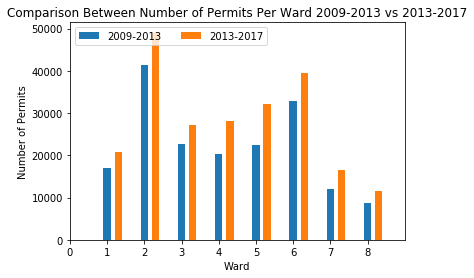

In [44]:
#Compare the relationship between two time periods
plt.figure()
axes= plt.axes()
axes.set_xlim([0,9])
axes.set_xticks([0,1,2,3,4,5,6,7,8])

n = 2
ind = np.arange(n)  # the x locations for the groups
width = 0.3

plt.title("Comparison Between Number of Permits Per Ward 2009-2013 vs 2013-2017") 
plt.xlabel("Ward")
plt.ylabel("Number of Permits")

plt.bar(permit_amount2["WARD"],permit_amount2["Number of Permits"], width = .2, label = "2009-2013")
plt.bar(permit_amount["WARD"] + width,permit_amount["Number of Permits"], width = .2, label = "2013-2017")

plt.legend(loc=2, ncol=2)
plt.show()

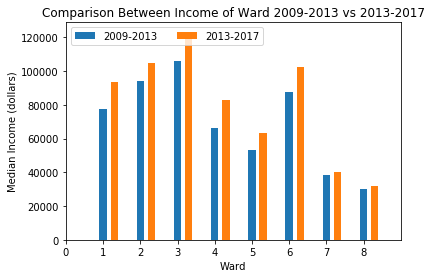

In [51]:
plt.figure()
axes= plt.axes()
axes.set_xlim([0,9])
axes.set_xticks([0,1,2,3,4,5,6,7,8])

n = 2
ind = np.arange(n)  # the x locations for the groups
width = 0.3

plt.title("Comparison Between Income of Ward 2009-2013 vs 2013-2017") 
plt.xlabel("Ward")
plt.ylabel("Median Income (dollars)")

plt.bar(income_data2["WARD"],income_data2["Median Income (dollars)"], width = .2, label = "2009-2013")
plt.bar(income_data["WARD"] + width, income_data["Median Income (dollars)"], width = .2, label = "2013-2017")

plt.legend(loc=2, ncol=2)
plt.show()

Looking at the two bar plots side by side that compared the number of permits and the number of income per ward, we could see that generally, the wards with the lowest income had the lowest amount of permits. On the other hand, the wards with the highest income, more specifically 2, 3, and 6, generally had the highest number of permits. It’s hard to tell the relationship between the two variables, but we can see a slight trend. We could also see that the number of permits and the income amount of each ward increased from the previous year range. This tells us that neighborhoods are getting more redeveloped overall. However, the most concentration of redevelopment is seen in ward 2. These graphs do little with showing the relationship, but they offered some interesting insights. To get a more concrete visualization and answer about the relationship, a scatter plot and Pearson’s correlation was done. Based on these two methods, there is a moderately positive correlation between income and the amount of permits. Our scatter plot showed that as the number of permits increases, the number of income increases. 

                                                   -------

To get a more concrete visualization and answer about the relationship, a scatter plot and Pearson’s correlation was done. Based on these two methods, there is a moderately positive correlation between income and the amount of permits, as our correlation (r) = 0.70. Our scatter plot showed that as the number of permits increases, the number of income increases. 

   WARD  Number of Permits  Median Income (dollars) Year Range
0     1              20704                    93284  2013-2017
1     2              49027                   104504  2013-2017
2     3              27067                   122680  2013-2017
3     4              28149                    82625  2013-2017
4     5              32168                    63552  2013-2017
5     6              39413                   102214  2013-2017
6     7              16491                    40021  2013-2017
7     8              11473                    31954  2013-2017
0     1              17057                    77602  2009-2013
1     2              41332                    94346  2009-2013
2     3              22580                   106151  2009-2013
3     4              20239                    66245  2009-2013
4     5              22432                    53058  2009-2013
5     6              32824                    87393  2009-2013
6     7              11939                    38660  20

Text(0.5, 1.0, 'Relationship of Income and Number of Permits')

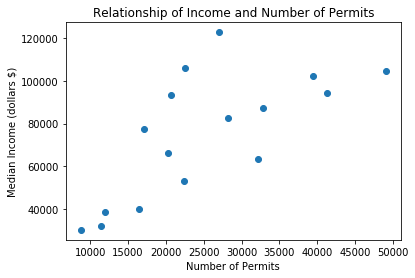

In [46]:
#Scatter Plot
#Merge both 2009-2013 and 2013-2017 datasets into one dataset for a graph
data = pd.concat([permit_income, permit_income2])
print(data)
plt.scatter(data["Number of Permits"], data["Median Income (dollars)"])
plt.xlabel("Number of Permits")
plt.ylabel("Median Income (dollars $)")
plt.title("Relationship of Income and Number of Permits")

In [50]:
#View Final Merged Data
data

,WARD,Number of Permits,Median Income (dollars),Year Range
0,1,20704,93284,2013-2017
1,2,49027,104504,2013-2017
2,3,27067,122680,2013-2017
3,4,28149,82625,2013-2017
4,5,32168,63552,2013-2017
5,6,39413,102214,2013-2017
6,7,16491,40021,2013-2017
7,8,11473,31954,2013-2017
0,1,17057,77602,2009-2013
1,2,41332,94346,2009-2013


In [47]:
#Correlation
data[["Number of Permits", "Median Income (dollars)"]].corr()

,Number of Permits,Median Income (dollars)
Number of Permits,1.000000,0.704257
Median Income (dollars),0.704257,1.000000


## Discussion
Based on the results, there is indeed a relationship between income and number of permits. Although not a strong one, there is a correlation. From the bar plots, we saw that wards with the highest income had the highest number of permits. This correlation doesn’t necessarily mean that higher income neighborhoods will always see more redevelopment. However, the trend that we witnessed in the graphs signifies that there is a trend here that can be examined. To answer the question of why these neighborhoods experience more redevelopment, it may not be that these high income neighborhoods experience more redevelopment, but that the redevelopment in these neighborhoods may be resulting in an increase in higher income. 

A neighborhood that’s more redeveloped attracts more families from higher income backgrounds. Furthermore, as more higher income families move into these neighborhoods, more permits may be applied for in order to maintain the buildings and the neighborhood. This is possibly why we’re seeing building permits increase as income increases. This unfortunately leaves other wards or neighborhoods left out of the redevelopment process. However, building owners and contractors could benefit from this report as they can make better investments and decisions as to where they want to redevelop and invest. 

## Limitations
Our results showed a moderately positive correlation between median household income and the amount of permits in a ward. However, there are some limitations of the data and our analysis that may affect the validity and reliability of our results. 
One limitation is that we looked at the income and amount of development data in intervals of time rather than year by year. If we looked at it by year we could compare the number of permits and the income level of that ward and better see trends and how the variables have changed over time. If there were more data points it could affect the correlation and scatter plot and we could possibly see a stronger relationship between development and income. We also only looked at building permit and income data from 2009-2017, so it would be interesting to expand that range and look at more recent data, but also much older data, so we can get a better idea of how the numbers changed over time. Development can take a while, so perhaps our range of 8 years is not enough to measure this. 


Another limitation is that we did our analysis by ward. Maybe if we were to continue our research we could analyse the data by neighborhood, which could provide a better idea of which specific areas are experiencing development, since wards are quite large. Within a ward there can be a large variation of demographics, such as income, among neighborhoods. This means that the average income of a ward may not be representative of ward’s population. Some areas could have a high income, while others have a low income, but all be in the same ward. This could affect the analysis of the results because the average of the two may not be very representative of most people in the ward. By examining neighborhoods, we would be looking at a smaller area, so there is probably less income variation.


If we were to continue working on this problem we could look at other demographics of the areas, such as age, population, or race, so that we could know if other factors play a role in how many building permits are in a ward. For example, maybe we are seeing more permits in areas with larger populations so it could be helpful to calculate the ratio between how many people there are in the area and how many permits there are. We could then compare the number of permits per person that we calculated among each ward.


## Conclusion
For our project we investigated the relationship between the average income and the amount of permits among DC wards. We wanted to see if redevelopment is more prominent in certain areas based on how much wealth there is there. After analyzing the data we discovered a moderate positive correlation, meaning that higher income areas have a larger amount of permits. Although, as discussed above, there are more areas that one could explore in order to come up with more interpretations.